In [1]:
import Laplin as lp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = 'amostraG_tratada.txt'
cpmg = lp.ExpData()
cpmg.loadFile(file,1,2)

In [3]:
for i in range(len(cpmg.x)):
    cpmg.x[i] *= 1e-3

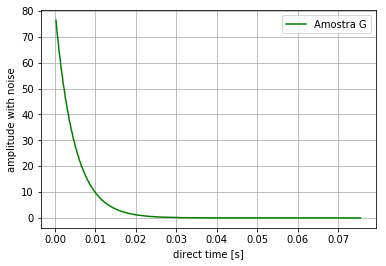

In [4]:
plt.plot(cpmg.x,cpmg.yn,'g-')
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Amostra G'],loc=0)
plt.savefig('Nome Dec.png',dpi=300)

O pico de intensidade ocorre para T2 = 4.535 ms.
Amostra G, com intervalo de 100 pontos entre 1e-4 e 1e0 do espaço inverso.


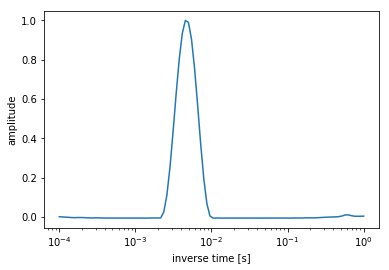

In [27]:
reg = lp.InvLaplace(cpmg, 0)
reg.genX(1e-4,1e0,100)
reg.genY([0,0,1], 0, 'nn0')

N = max(reg.Y)
for j in range(len(reg.Y)):
    reg.Y[j] /= N

for k in range(len(reg.Y)):
    if reg.Y[k] == max(reg.Y):
        print 'O pico de intensidade ocorre para T2 =', round(reg.X[k]/1e-3,3), 'ms.'
print 'Amostra G, com intervalo de', len(reg.X), 'pontos entre 1e-4 e 1e0 do espaço inverso.'

reg.plotData()

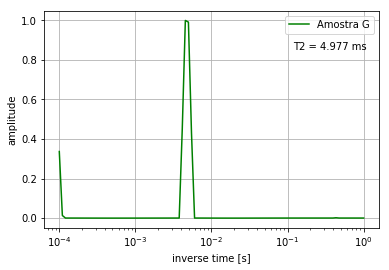

In [10]:
plt.plot(reg.X,reg.Y,'g-')
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Amostra G'], loc=0)
plt.text(1.2e-1, 0.85, 'T2 = 4.977 ms')
plt.savefig('nome.png', dpi=300)